In [1]:
#Task 1: Analyse positive and negative youtube comments
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
comments = pd.read_csv(r'C:\Users\manis\OneDrive\Desktop\Youtube/GBcomments.csv', error_bad_lines=False)
comments

b'Skipping line 113225: expected 4 fields, saw 5\n'
b'Skipping line 158379: expected 4 fields, saw 7\nSkipping line 241590: expected 4 fields, saw 5\nSkipping line 245637: expected 4 fields, saw 7\n'
b'Skipping line 521402: expected 4 fields, saw 5\n'


,video_id,comment_text,likes,replies
0,jt2OHQh0HoQ,It's more accurate to call it the M+ (1000) be...,0,0
1,jt2OHQh0HoQ,To be there with a samsung phone\n😂😂😂,1,0
2,jt2OHQh0HoQ,"Thank gosh, a place I can watch it without hav...",0,0
3,jt2OHQh0HoQ,What happened to the home button on the iPhone...,0,0
4,jt2OHQh0HoQ,Power is the disease. Care is the cure. Keep...,0,0
...,...,...,...,...
718447,lLN1FwiqGwc,MEME ME MEME ME MEME ME,0,0
718448,lLN1FwiqGwc,"Yeah, but does everybody float?",0,0
718449,lLN1FwiqGwc,That meme me dace 😂,0,0
718450,lLN1FwiqGwc,10:43 Is that Miles Upshur????,2,0


In [2]:
comments.head()

,video_id,comment_text,likes,replies
0,jt2OHQh0HoQ,It's more accurate to call it the M+ (1000) be...,0,0
1,jt2OHQh0HoQ,To be there with a samsung phone\n😂😂😂,1,0
2,jt2OHQh0HoQ,"Thank gosh, a place I can watch it without hav...",0,0
3,jt2OHQh0HoQ,What happened to the home button on the iPhone...,0,0
4,jt2OHQh0HoQ,Power is the disease. Care is the cure. Keep...,0,0


In [3]:
!pip install textblob

In [4]:
from textblob import TextBlob
# perform sentiment analysis wrt a particular comment
TextBlob('What happened to the home button on the iPhone...').sentiment.polarity

0.0

In [5]:
#we can perform sentiment analysis for all the comments. But, for this, we need to check for rows containing NULL.
comments.isna().sum()

video_id         0
comment_text    28
likes            0
replies          0
dtype: int64

In [6]:
#from above, we can see that, comment_text has 28 missing/NULL values

In [7]:
#we will drop all NULL values
comments.dropna(inplace=True)

In [8]:
p=[]
for i in comments['comment_text']:
    p.append(TextBlob(i).sentiment.polarity)

In [9]:
comments['polarity']=p #adding a column 'polarity' in the existing frame and assiging the value of p i.e. polarity to the new column

In [10]:
comments.head()

,video_id,comment_text,likes,replies,polarity
0,jt2OHQh0HoQ,It's more accurate to call it the M+ (1000) be...,0,0,0.45
1,jt2OHQh0HoQ,To be there with a samsung phone\n😂😂😂,1,0,0.00
2,jt2OHQh0HoQ,"Thank gosh, a place I can watch it without hav...",0,0,0.00
3,jt2OHQh0HoQ,What happened to the home button on the iPhone...,0,0,0.00
4,jt2OHQh0HoQ,Power is the disease. Care is the cure. Keep...,0,0,1.00


In [11]:
comments.head(10) #to obtain first rows

,video_id,comment_text,likes,replies,polarity
0,jt2OHQh0HoQ,It's more accurate to call it the M+ (1000) be...,0,0,0.450000
1,jt2OHQh0HoQ,To be there with a samsung phone\n😂😂😂,1,0,0.000000
2,jt2OHQh0HoQ,"Thank gosh, a place I can watch it without hav...",0,0,0.000000
3,jt2OHQh0HoQ,What happened to the home button on the iPhone...,0,0,0.000000
4,jt2OHQh0HoQ,Power is the disease. Care is the cure. Keep...,0,0,1.000000
5,jt2OHQh0HoQ,Keep calm and buy iphone 8 Keep calm and buy i...,0,0,0.300000
6,jt2OHQh0HoQ,i am a big fan of youtube and u !!!!!!!!!!!!!,0,0,0.000000
7,jt2OHQh0HoQ,You will never find Losers who line up and pay...,0,0,-0.100000
8,jt2OHQh0HoQ,*APPLE JUST COMMENTED ON MY LAST VIDEO* I'm cr...,0,0,0.028571
9,jt2OHQh0HoQ,"I'm only here to see Emma, I love her so much!...",0,0,0.500000


In [12]:
# perform Exploratory data analysis for +ve and -ve sentiments

In [13]:
#extract positive comments
positive_comments = comments[comments['polarity']>0.5]

In [14]:
positive_comments.shape #to identify the number of rows and columns having positive polarity

(99894, 5)

In [15]:
positive_comments.head() #to obtain data/comments having positive polarity

,video_id,comment_text,likes,replies,polarity
4,jt2OHQh0HoQ,Power is the disease. Care is the cure. Keep...,0,0,1.0
26,jt2OHQh0HoQ,The best thing to ever happen to iPhone,0,2,1.0
45,jt2OHQh0HoQ,Amazing ✌️,0,0,0.6
47,jt2OHQh0HoQ,Good job,0,0,0.7
52,jt2OHQh0HoQ,Good Job steve jobs RIP,0,0,0.7


In [16]:
!pip install wordcloud #wordcloud package is installed to visulaize words(comments in this file)

ERROR: Invalid requirement: '#wordcloud'


In [17]:
from wordcloud import WordCloud, STOPWORDS  #WordCloud, STOPWORDS are classes in wordcloud

In [18]:
#extract unique stopwords
StopWords = set(STOPWORDS)

In [19]:
total_comments=' '.join(positive_comments['comment_text']) #join all the postive comments for the wordcloud to visualize

In [20]:
wordcloud=WordCloud(width=1000,height=500,stopwords= StopWords).generate(total_comments)

(-0.5, 999.5, 499.5, -0.5)

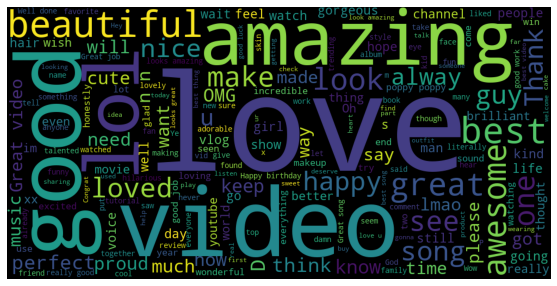

In [21]:
plt.figure(figsize=(15,5))
plt.imshow(wordcloud)
plt.axis('off')

In [22]:
negative_comments = comments[comments['polarity']<-0.5]

In [23]:
negative_comments.shape

(17829, 5)

In [24]:
negative_comments.head()

,video_id,comment_text,likes,replies,polarity
99,jt2OHQh0HoQ,Fuck i want this !!! But i have no money,0,2,-0.78125
233,T_PuZBdT2iM,I was disappointed with the level the comedy r...,0,0,-0.75000
241,T_PuZBdT2iM,"i beat up a kid like this in highschool, i hat...",0,0,-0.80000
253,T_PuZBdT2iM,Yeah but you can speak Korean so this video is...,0,0,-0.80000
287,T_PuZBdT2iM,U still ugly tho,1,0,-0.70000


In [25]:
total_comments = ' '.join(negative_comments['comment_text'])

In [26]:
wordcloud=WordCloud(width=1000,height=500,stopwords= StopWords).generate(total_comments)

(-0.5, 999.5, 499.5, -0.5)

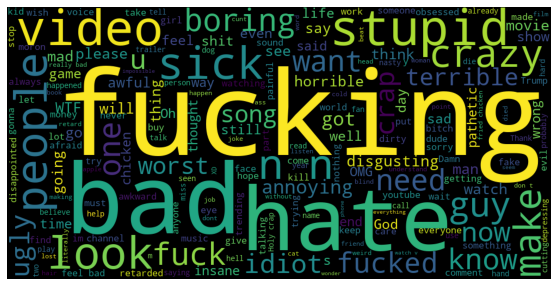

In [27]:
#wordcloud visualization for negative comments
plt.figure(figsize=(15,5))
plt.imshow(wordcloud)
plt.axis('off')

In [28]:
#Task 2: Analyse trending tags on Youtube

In [29]:
videos = pd.read_csv(r'C:\Users\manis\OneDrive\Desktop\Youtube/USvideos.csv',error_bad_lines=False)

b'Skipping line 2401: expected 11 fields, saw 21\nSkipping line 2800: expected 11 fields, saw 21\nSkipping line 5297: expected 11 fields, saw 12\nSkipping line 5299: expected 11 fields, saw 12\nSkipping line 5300: expected 11 fields, saw 12\nSkipping line 5301: expected 11 fields, saw 12\n'


In [30]:
videos.head() #an overview of how the dataframe looks like

,video_id,title,channel_title,category_id,tags,views,likes,dislikes,comment_total,thumbnail_link,date
0,XpVt6Z1Gjjo,1 YEAR OF VLOGGING -- HOW LOGAN PAUL CHANGED Y...,Logan Paul Vlogs,24,logan paul vlog|logan paul|logan|paul|olympics...,4394029,320053,5931,46245,https://i.ytimg.com/vi/XpVt6Z1Gjjo/default.jpg,13.09
1,K4wEI5zhHB0,iPhone X — Introducing iPhone X — Apple,Apple,28,Apple|iPhone 10|iPhone Ten|iPhone|Portrait Lig...,7860119,185853,26679,0,https://i.ytimg.com/vi/K4wEI5zhHB0/default.jpg,13.09
2,cLdxuaxaQwc,My Response,PewDiePie,22,[none],5845909,576597,39774,170708,https://i.ytimg.com/vi/cLdxuaxaQwc/default.jpg,13.09
3,WYYvHb03Eog,Apple iPhone X first look,The Verge,28,apple iphone x hands on|Apple iPhone X|iPhone ...,2642103,24975,4542,12829,https://i.ytimg.com/vi/WYYvHb03Eog/default.jpg,13.09
4,sjlHnJvXdQs,iPhone X (parody),jacksfilms,23,jacksfilms|parody|parodies|iphone|iphone x|iph...,1168130,96666,568,6666,https://i.ytimg.com/vi/sjlHnJvXdQs/default.jpg,13.09


In [31]:
videos['tags'] #since we have to work on tag data, so lets extract tags text only

0       logan paul vlog|logan paul|logan|paul|olympics...
1       Apple|iPhone 10|iPhone Ten|iPhone|Portrait Lig...
2                                                  [none]
3       apple iphone x hands on|Apple iPhone X|iPhone ...
4       jacksfilms|parody|parodies|iphone|iphone x|iph...
                              ...                        
7987    sinkhole|how do sinkholes form|sinkhole in wat...
7988    Business Insider|Donald Trump|Hillary Clinton|...
7989    LP|Death Valley|Other People|Lost On You|The M...
7990    YouTube FanFest|#YTFF|Washington DC|USA|YTFF|#...
7991    LIGO|Virgo|collaboration|space|science|nationa...
Name: tags, Length: 7992, dtype: object

In [32]:
#let's join tags text for wordcloud to visualize
all_video_tags=' '.join(videos['tags'])

In [33]:
all_video_tags

"logan paul vlog|logan paul|logan|paul|olympics|logan paul youtube|vlog|daily|comedy|hollywood|parrot|maverick|bird|maverick clothes|diamond play button|logan paul diamond play button|10M subscribers|logan paul 1 year vlogging|1 year vlog|dwarf mamba play button|logan paul history|youtube history|10M|10M plaque|youtube button|diamond button|logang|logang 4 life Apple|iPhone 10|iPhone Ten|iPhone|Portrait Lighting|A11 Bionic|augmented reality|emoji|animoji|Face ID|Apple Pay|camera|smartphone [none] apple iphone x hands on|Apple iPhone X|iPhone X|apple iphone x first look|iPhone X first look|apple iphone x event 2017|apple iphone x event|iPhone X price|iPhone X specs|iPhone X design|iPhone X camera|iPhone X home button|iPhone X wireless charging|iPhone X waterproof|iPhone X release date|iphone 2017|apple|iphone|ios 11|the verge|verge jacksfilms|parody|parodies|iphone|iphone x|iphone 8|apple|emoji a24|a24 films|a24 trailers|independent films|trailer|HD|official|movie|film|a24 movies|oscar 

In [34]:
#From above output, we can say that the data is noisy as it contains special character. So, we need to remove it in order to get clean data
import re

In [35]:
tags=re.sub("[^'a-zA-Z']",'',all_video_tags) #Remove everything except for characters/text

In [36]:
#tags.info()
videos["tags"].shape

(7992,)

In [37]:
wordcloud = WordCloud(width=1000,height=500,stopwords= set(StopWords)).generate(tags[:200])

(-0.5, 999.5, 499.5, -0.5)

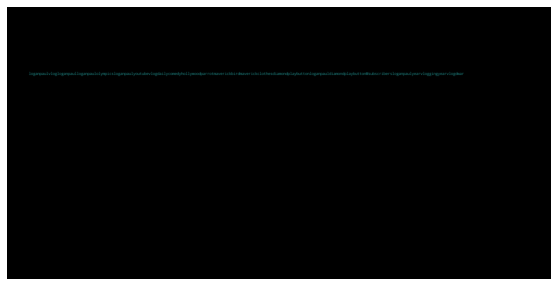

In [38]:
#wordcloud visualization for video tags
plt.figure(figsize=(15,5))
plt.imshow(wordcloud)
plt.axis('off')

Text(0.5, 1.0, 'regression plot for views and likes')

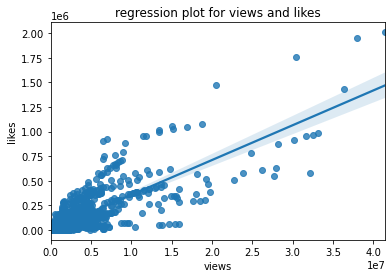

In [39]:
sn.regplot(data=videos,x='views',y='likes')
plt.title('regression plot for views and likes')

Text(0.5, 1.0, 'regression plot for views and comment_total')

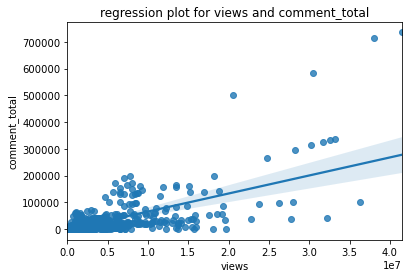

In [40]:
sn.regplot(data=videos,x='views',y='comment_total')
plt.title('regression plot for views and comment_total')

In [41]:
df_corr=videos[['views','likes','dislikes']]

In [42]:
df_corr.corr()

,views,likes,dislikes
views,1.000000,0.832844,0.541955
likes,0.832844,1.000000,0.497439
dislikes,0.541955,0.497439,1.000000


<AxesSubplot:>

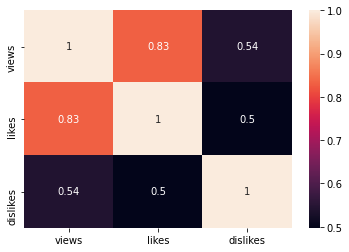

In [43]:
sn.heatmap(df_corr.corr(),annot=True)

In [44]:
#Emoji analysis on comments

In [45]:
comments.head()

,video_id,comment_text,likes,replies,polarity
0,jt2OHQh0HoQ,It's more accurate to call it the M+ (1000) be...,0,0,0.45
1,jt2OHQh0HoQ,To be there with a samsung phone\n😂😂😂,1,0,0.00
2,jt2OHQh0HoQ,"Thank gosh, a place I can watch it without hav...",0,0,0.00
3,jt2OHQh0HoQ,What happened to the home button on the iPhone...,0,0,0.00
4,jt2OHQh0HoQ,Power is the disease. Care is the cure. Keep...,0,0,1.00


In [46]:
comments['comment_text'][1] #let's look at the 2nd comment

'To be there with a samsung phone\\n😂😂😂'

In [47]:
!pip install emoji

In [48]:
import emoji

In [49]:
len(comments)  #There are around 718424 rows

718424

In [50]:
#extract emoji from comments

In [51]:
comment=comments['comment_text'][1]
comment
#def extract_emoji(comment):
 #   print(''.join(c for c in comment if c in emoji.UNICODE_EMOJI['en'] ))

'To be there with a samsung phone\\n😂😂😂'

In [52]:
print("\U0001f600")

😀


In [53]:
import re

In [54]:
re.findall(r'[^\w\s,]', comment)

['\\', '😂', '😂', '😂']

In [55]:
#str=''
#for i in comments['comment_text']:
 #   list = [c for c in i if c in re.findall(r'[^\w\s,]',i)]
  #  for ele in list:
   #     str=str+ele
s = ''
counter = 0
for comment in comments['comment_text']:
    counter += 1
    #if counter > 1000:
     #   break
    matches = re.findall(r'[^\w\s,\x00-\x7F]', comment)
    lst = [c for c in comment if c in matches]
    for ele in lst:
        s = s + ele

In [56]:
print(s)

😂😂😂’😭😭😭😢😢😢❤️❤️😂👏👇👇👇👇👇👇👇👇👇👇🌞€€€€😎😣😥😫😭✌️😂👎🏻👎🏻👎🏻👎🏻😂🖕😘😘▶⏭⏮◀🔥🔥😊😊🤔🤔😂😂😂😂♡👏🏻👏🏻’​´´´❤️❤️😜．😍😍😅❤😍😍✌😂😂😂😊😂😂😂😂😏😏🇪🇸😭💔😊❤️❤️❤️❤️❤️😂😂😊❤️😂🤣✨🌈😘😂😂❤️😊😂😊😂💗😂😊😊😊’’’💖🐢😉😍😂😂💗💗😻😻❤️😂😂❤️❤🤗👌🏼👌🏼😂😂😂😂💖😩🙊♥♥♥✓😂😂😂💙💙💙💙💙💙😂😂😂❤❤❤😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😱😊😛🌳🌽🎃🚣🚂😂😂😊😕😋█▬██▀█▀➨🤣😅😢💔😂😊🤡🙏🙏🙏👊🏿🙇🏽👋😅😅😅😅😂😂🤔！😎😎😎😎😎😎😎😍😍😍😍😍😍😘😘😘😘😘😘😘😲🖕💪🤘💓☺️☺️😂😂😂💕😄😄😍💕😉😩❤️❤️💕❤️😂💕😍💗👫💖😆💕💖💕😍😍😊😄😍😀💗🦄😍££😊😂😊👍😍♥️❤️😂👶🏻🤗☺️😘💙💙💙😍😍😊😎🤘🖤👌👌“““”““😍😂👌🍍😎😎😄😄😄😄😂😂😂😬💜💜💜😭😂♡😍😍💖😂😂😂😂😂😂😂😭😂😭😂😭😂😂😂😍😍😍😭😍😍😂👀👀🤔😂😂😂😂😂😂😂😂😂😂🍸🍸🍸🍸🍸😂😂😂🤣🤣🤣😂😂😂😂😍💜💜💜💜😂😂😂😅😂“’”😍💖😂😻😉🔥❤️😻❤️😭😭😭😭😭😭😭👍🏻😍💚💙♡♡❤❤😫❤️❤❤❤❤♡♥😍❤😊😍😎💄🐐😅😂😂😊…😊’“”’’👀👌🏽❤❤❤😂💖🎉💪💪🏽😎🙌🙌😜❤❤️💛💛😎🙏💚🎉🎉❤️🎉🎉🎉🎉🎊🎉🎊🎉😭💗😍😍😍😍😍😍😍👏✌😁❤️❤️😂💋💋❥❥❥👫💘😻💋💋😂👑’🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥😂😐😑😩👌🏻🔥💖👏🏻👀✨👅💦💕’’‘❤️😍🔥🔥🔥❤️❤❤❤❤❤❤👌😍😍😍¿😞🌴💜💜💜💜😍😍😍😍😍❤️❤️❤️❤️❤️、！😊❤️❤️❤️❤️🍔🍟🇺🇸😒🌿😄😄😄😉🍲🍱🎏❤️💪👊🏽😘😂😂😂❤️🙋☺️😍😍😚💕😉😂❤❤😊☺️💓🌸🙄🙄🙄🙁😞😊🙄£😍😨😍😍😍😍😎😃😂😍😏😌😂😎🤑😂😉👍🏻🔥💯🚨😊☺😂😂😂🤣🙂❤❤️£😀😀😀♥♥😂❤️😂😓😭😂❤️❤️😖😖😂😂😂💗💝😘💐💐💐😂😍☺️😂❤️😭💕🙌🏽🙌🏽🙌🏽😘😘❤️❤️💖😫😖📱😂😏´🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗😁🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗😎😂😂👍🏼💯💕♥️♥️♥️😱😱😱❤️❤️❤️😍😍😩😩😩😩😩😩😩😍😻😻😻😻😻😳…🥀♥️♥️♥️♥️♥️♥😍😍😍🙃😂💕💕💕😍💕💕❤❤💕😍🍫🌹💖🇸🇸🇸🇸❤️😍👸🏿👸🏿👸🏿👸🏿👸🏿💗😊😊😩❤️👌🏼😻😊😍❤️£😂😂👏🏼❤️❤️♡♡❤❤❤£😍😍😍💚💚💚💚💚😍😭🌹😍❤️😍😍😍💚💚💚💚💚😍💚💚💚☺️💙😀😍💚😕😍’👌😂😂😂😍👌🏻💗❤💚💚💚😸😙😙😘💚💚💚💚😍😭😭💖💓💓💓😍❤️

In [57]:
len(s)

475497

In [60]:
#count the number of times a particular emoji occurs
result={}
for i in set(s):
    result[i] = s.count(i)

In [61]:
result.items()

dict_items([('🐷', 43), ('🎿', 10), ('⛹', 6), ('⚫', 49), ('👢', 53), ('🐄', 35), ('്', 20), ('⛎', 9), ('💔', 652), ('🤭', 16), ('͟', 36), ('🏥', 7), ('🚱', 7), ('╦', 34), ('ุ', 155), ('🌟', 587), ('🎬', 35), ('🖌', 6), ('⛯', 4), ('☛', 6), ('ै', 38), ('🍦', 48), ('🎈', 736), ('🕺', 41), ('㊙', 5), ('🚙', 9), ('☎', 14), ('🤟', 1), ('🧛', 2), ('☳', 4), ('ិ', 6), ('🤒', 43), ('\u200f', 2), ('⠬', 3), ('🔛', 12), ('Ⓜ', 5), ('🍟', 49), ('😮', 596), ('্', 5), ('︿', 2), ('̍', 17), ('︻', 24), ('✖', 64), ('😿', 127), ('♒', 10), ('🤛', 23), ('͜', 1594), ('🔭', 13), ('⌁', 3), ('🚛', 5), ('╲', 97), ('🌚', 59), ('ื', 219), ('＆', 3), ('⛽', 30), ('͊', 32), ('⣳', 20), ('🍼', 178), ('♬', 6), ('🤖', 16), ('͐', 21), ('⢔', 3), ('🕸', 22), ('🥟', 1), ('💘', 739), ('⢲', 2), ('🏽', 1875), ('🌖', 20), ('‿', 16), ('🔜', 23), ('⚋', 4), ('️', 28059), ('💼', 22), ('📒', 19), ('🥕', 7), ('👭', 75), ('⢥', 2), ('🌎', 127), ('🕶', 41), ('🐥', 117), ('🐫', 22), ('🚂', 11), ('🕍', 6), ('♘', 4), ('🏋', 11), ('🧟', 4), ('🔣', 5), ('：', 9), ('➳', 7), ('☔', 25), ('🥡', 1),

In [64]:
#to get the sorted key-value representation of smiley and its count:
final_result = {}
for key,value in sorted(result.items(),key=lambda item:item[1]):
    final_result[key]=value

In [66]:
final_result.items()

dict_items([('🤟', 1), ('🥟', 1), ('🥡', 1), ('☓', 1), ('🥜', 1), ('🦏', 1), ('┘', 1), ('⡴', 1), ('᙭', 1), ('≈', 1), ('🅒', 1), ('⠍', 1), ('🅣', 1), ('⡚', 1), ('⠏', 1), ('⣊', 1), ('🅳', 1), ('‰', 1), ('⡵', 1), ('⌑', 1), ('↬', 1), ('🧠', 1), ('］', 1), ('〕', 1), ('🛒', 1), ('🤾', 1), ('‽', 1), ('⢩', 1), ('〔', 1), ('༼', 1), ('−', 1), ('＃', 1), ('⡠', 1), ('⡦', 1), ('⠚', 1), ('🛷', 1), ('≠', 1), ('⡨', 1), ('ֱ', 1), ('＝', 1), ('🤽', 1), ('℅', 1), ('＞', 1), ('⢒', 1), ('⁈', 1), ('🅟', 1), ('◇', 1), ('🅕', 1), ('🤹', 1), ('ⓙ', 1), ('⣔', 1), ('⣨', 1), ('🥌', 1), ('‥', 1), ('‑', 1), ('∨', 1), ('▍', 1), ('🤺', 1), ('\U000feb0d', 1), ('◙', 1), ('🥚', 1), ('✩', 1), ('🧣', 1), ('⣰', 1), ('›', 1), ('∠', 1), ('［', 1), ('🙩', 1), ('⣶', 1), ('‚', 1), ('🦓', 1), ('￦', 1), ('🧤', 1), ('゛', 1), ('ং', 1), ('༄', 1), ('🥨', 1), ('▾', 1), ('⣄', 1), ('╹', 1), ('＇', 1), ('⠯', 1), ('🅡', 1), ('⣃', 1), ('🧛', 2), ('\u200f', 2), ('︿', 2), ('⢲', 2), ('⢥', 2), ('Ⓟ', 2), ('⣹', 2), ('⣐', 2), ('⢭', 2), ('ٍ', 2), ('🧡', 2), ('✧', 2), ('⠺', 2), ('ৃ'

In [69]:
!pip install plotly
!pip install cufflinks

  Created wheel for cufflinks: filename=cufflinks-0.17.3-py3-none-any.whl size=68724 sha256=56d5d380d6dfe83ee1f0227c6e489220a19eb5604405b1ce21a57f23fce3f7d2
  Stored in directory: c:\users\manis\appdata\local\pip\cache\wheels\6b\76\62\6da97734911ffcbdd559fd1a3f28526321f0ae699182a23866
Successfully built cufflinks


In [73]:
import plotly.graph_objs as go
from plotly.offline import iplot

In [80]:
#df = pd.DataFrame({'chars':key[-20:],'num':value[-20:]})

TypeError: 'int' object is not subscriptable